<IPython.core.display.Javascript object>


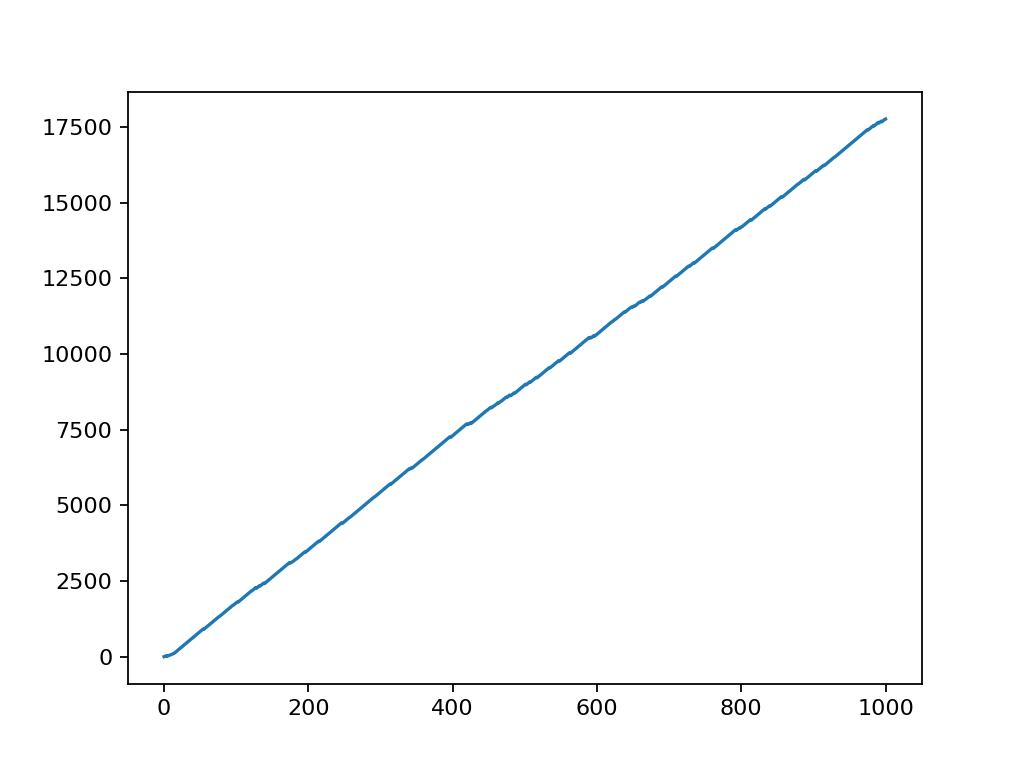

In [13]:
import random

STEPS = 1000
EPSILON = 0.1

def bandit(action):
    return {
        1: 10,
        2: -10,
        3: 20,
        4: -20
    }[action]


N = {
    1: 0,
    2: 0,
    3: 0,
    4: 0,
}
Q = {
    1: 0,
    2: 0,
    3: 0,
    4: 0
}
n = 0
totals = {
    0: 0
}

while n < STEPS:
    action = 0
    if random.random() < EPSILON:
        action = random.choice([1, 2, 3, 4])
    else:
        action = max(Q, key=Q.get)
    reward = bandit(action)
    totals[n + 1] = totals[n] + reward
    # uncomment to track step by step
    # print(f'step {n}: action {action} is taken with reward {reward}')
    N[action] += 1
    Q[action] = Q[action] + 1/N[action] * (reward - Q[action])
    n += 1
    
%matplotlib notebook

import matplotlib.pyplot as plt
x, y = zip(*sorted(totals.items()))
plt.plot(x, y)
plt.show()